<h1 style="text-align: center; font-weight: bold;">Artificial Intelligence Course - Fall 1402</h1>
<h1 style="text-align: center; font-weight: bold;">Soheil Hajian Manesh 810100119</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment #3 - Hidden Markov Model</h1>

# Problem Description
In this project we should classification our model based on hidden markov model algorithm.We have musics from 4 genres.Our models should train with a portion of data and then trained model should predicts test data. after that we analize our trained model performance based on these standards:
- `Accuracy`
- `Precision`
- `Recall`
- `F1 Score`

In [21]:
import numpy as np
import librosa
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from hmmlearn import hmm
import seaborn as sb
from sklearn.metrics import confusion_matrix,precision_score, recall_score
from sklearn.metrics import f1_score as calculate_f1_score

# PreProcessing
## Question 1:
### Why is it necessary that the samples have the same length?
- Many machine learning models accept fixed-length inputs. by having all samples with the same length we can create a consistent input shape for the model we are using.

- When training a model we can process the data in batches and it is a common way for processing. having samples with the same length makes batch processing effecient.

- Having samples of the same length makes the preprocessing steps easier. we don't need to consider variable-length sequences.

- Because MFCCs often computed over fixed-length audios having inputs with same length helps comparing the extracted feature across different samples.

In [22]:
EACH_PART_SECOND=10
TRAIN_DATA_PERCENT=80
NUM_HIDDEN_STATES = 4  
NUM_ITERATIONS = 2  
SAMPLE_RATE=22050

In [23]:
genres = ["metal" ,"blues", "hiphop", "pop"]
audios = {genre: [] for genre in genres} 
part_len=EACH_PART_SECOND*SAMPLE_RATE
for genre in genres:
    genreFolder = Path(f"{Path().absolute()}/{genre}")
    audiosPathes = genreFolder.glob('*')
    for audioPath in audiosPathes:
        song , _ = librosa.load(audioPath,sr=SAMPLE_RATE)
        for i in range(0,len(song),part_len):
            if(not(i+part_len >= len(song))):
                audios[genre].append(song[i:i+part_len])            

In [24]:
mfccs={}
for genre in genres:
    genre_mfccs=[]
    for audio in audios[genre]:
            mfcc=librosa.feature.mfcc(n_mfcc=13,y=audio, sr=SAMPLE_RATE)
            mfcc /= np.amax(mfcc)
            mfcc_transposed = mfcc.T 
            genre_mfccs.append( mfcc_transposed)
    mfccs[genre]=genre_mfccs

In [25]:
train_data={}
test_data={}
for genre in genres:
    train_size=int(TRAIN_DATA_PERCENT*len(mfccs[genre])/100)
    train_data[genre]=mfccs[genre][0:train_size]
    test_data[genre]=mfccs[genre][train_size:]

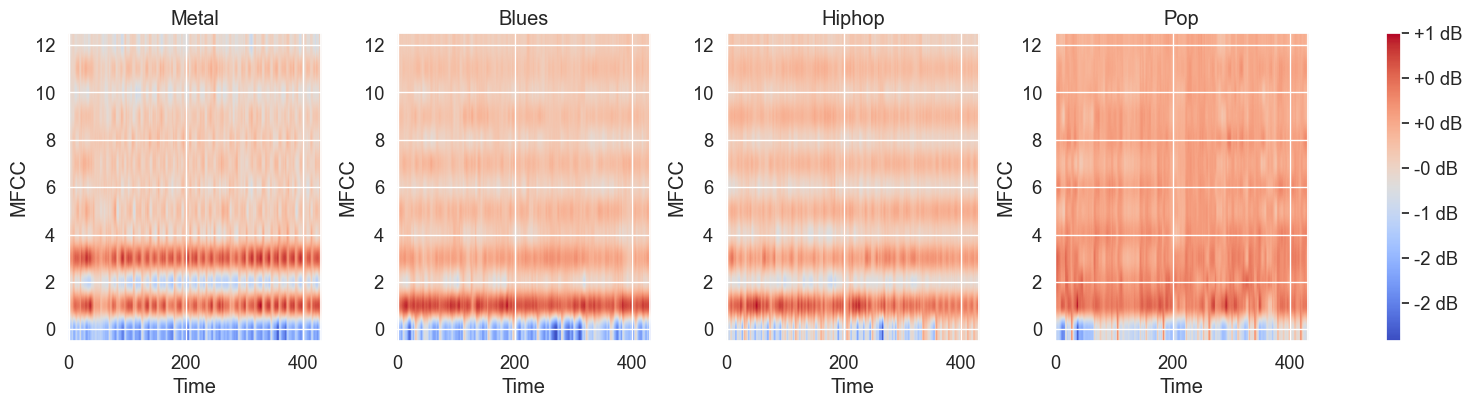

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=len(genres), figsize=(20, 4))
plt.subplots_adjust(wspace=0.3)
for ax, genre in zip(axes, genres):
    mfcc = mfccs[genre][0].T
    img = ax.imshow(mfcc, cmap='coolwarm',aspect='auto', origin='lower')
    ax.set_title(f'{genre.capitalize()}')
    ax.set_ylabel('MFCC')
    ax.set_xlabel('Time')
fig.colorbar(img, ax=axes.ravel().tolist(), format='%+2.0f dB')
plt.show()

## Question 2:
### Why do the frames used in the MFCC calculation overlap with each other?
- `Temporal Continuity`: Speech is a `continuous signal`. Overlapping frames `ensure` that these dependencies are captured.

- `Smoother Spectral Features`: By having overlap, the `spectral content between adjacent frames is more correlated`, which leads to smoother spectral feature transitions.

- `Reduction of Edge Effects`: Overlapping frames ensure that the `information at the edges isn’t lost`.

- `Increased Resolution`: Overlapping frames allow for a `higher time resolution` of feature extraction.

- `Stability in Noisy Environments`: Overlapping frames can improve the `robustness` of `feature extraction` in noisy environments by averaging out some of the effects of noise across overlapping sections of the signal.
## Question 3:
### Why are only 12 or 13 basic MFCC coefficients used in most sound-related projects?
The `first 13 coefficients` of MFCCs are used because they capture the `most important information` about the spectral envelope of the audio signal The first coefficient represents the `overall energy` of the signal, while the remaining 12 coefficients capture the `spectral shape` of the signal

# HMM
##  Question 1: 
### Explain what is meant by States and Observation? In this exercise, what are the states and how is observation obtained.

`States` are the underlying hidden conditions or configurations of a system that change over time, following a Markov process.   
`Observations` are the visible outputs that correspond to the underlying states, and they are what we measure or see.   
In our problem we can consider each genres as a state but I did't do this.I prefer to states don't refer to anything and they are randomly choosen.
observations in my code are mfccs coefficients that i calculated at first for every audio sample.
##  Question 2: 
### Explain First-order hmm and it's difference with other hmm model.
`First-Order` Markov chain model, is one for which the probability of an observation at a particular time t is dependent only on the immediate preceding one.This can be represented as :  $$ P(S_t | S_{t-1}, S_{t-2}, …, S_1) = P(S_t|S_{t-1})$$   
the differences between hmm models is based on how many previous states a state is depends on.for exmaple we have `Second-order` hmm model which the probability of an observation at a particular time t is dependent on its two previous times:   
$$ P(S_t | S_{t-1}, S_{t-2}, …, S_1) = P(S_t|S_{t-1},S_{t-2})$$   
## Question 3:
### Explain for what systems HMM is suitable for investigating and analyzing? Explain why this is the case.
`Hidden Markov Models` are particularly suited for systems where you have a sequence of observable events generated by a process that transitions through various states according to certain probabilities. HMMs are utilized in domains where there is an underlying system that can’t be observed directly (hence `hidden`), but can be inferred through`observable` variables.They are good at capturing the relationships between these events and can help us understand how things change over time.
Some suitable cases for HMMs:
   - **Speech Recognition**: In speech, the sound signal is an observable sequence, but the spoken words (the states) are hidden.HMMs have been foundational in this field because of their ability to map the audio signals to sequences of linguistic units.
   - **Natural Language Processing (NLP)**:HMMs can be used for part-of-speech tagging, where the observable events are words in a sentence, and the hidden states are the corresponding grammatical categories.
   - **Bioinformatics**: In gene prediction, the sequences of nucleotides are observed, while the actual structure of genes (introns, exons etc.) are the hidden states. HMMs help in identifying these genomic elements.
   - **Weather Prediction**: While atmospheric data such as temperature and humidity can be measured, the overall weather system state (like the formation and trajectory of storms) is a hidden process that can be modeled with HMMs.

## Question 4:
### Explain advantages and disadvantages of HMM.
- **Advantages**:  
    - Ideal for modeling time-series and sequences where order is significant.
    - Capable of handling both observed and unobserved states in complex stochastic processes.
    - Can forecast future states or observations for decision-making.
    - Adaptable to various situations by adjusting state spaces and parameters.
- **disadvantages**:
    - Training algorithms like EM might not find the globally optimal solution.
    - HMMs are sensitive to the choice of initial parameters and incorrect initialization may result in convergence to suboptimal.
    - One of the primary limitations is that the future state only depends on the current state. This can be overly simplistic for complex systems where future states may be influenced by longer historical contexts.
    

## Question 5:
### Write all types of HMM and explain some of them in short
   - Continuous HMMs (CHMMs): Traditional HMMs deal with discrete observations, but CHMMs are designed for continuous data. In a CHMM, the observation distributions are typically modeled with continuous probability distributions such as Gaussian or Gaussian mixtures. These models are often used in speech and handwriting recognition where the data is naturally continuous.
   - discrete HMM: In a discrete HMM the hidden states and the observations are discrete variables. this means that the hidden states have a finite set of values and the observations also belong to a discrete set. DHMMs are mostly used in applications such as part-of-speech tagging.
   - Autoregressive HMMs (ARHMMs):This variant includes an autoregressive component, meaning that the current observation depends on previous observations, as well as the current state. ARHMMs are used when the time series data exhibits strong temporal dependency beyond what is captured by the Markov process of the states.
   - Hidden Semi-Markov Models (HSMMs) 
   - Hierarchical HMMs (HHMMs)
   - Factorial HMMs
   - Profile HMMs  
   - Input-Output HMMs (IOHMMs)
   - Coupled HMMs (CHMMs)
   - Explicit-Duration HMMs
    
  

In [27]:
hmm_models_learn={}

for genre in genres:
    train_mfccs_for_genre = np.concatenate(train_data[genre])
    model = hmm.GaussianHMM(n_components=4, covariance_type='diag')
    model.fit(train_mfccs_for_genre)
    hmm_models_learn[genre]=model

In [28]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:, t] = observation_matrix[:, 0] * self.initial_prob[:, 0] 
            else:
                alpha[:, t] = np.matmul(self.transition_matrix.T, alpha[:, t-1]) * observation_matrix[:, t]

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.matmul(self.transition_matrix, (observation_matrix[:, t+1] * beta[:, t+1]))
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = multivariate_normal.pdf(obs.T,mean =self.mean[:,s],cov = self.covariances[:,:,s])
        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = np.sum(np.matmul(alpha[:, t], beta[:, t+1].T)*B[:, t+1])*self.transition_matrix
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:, t] * beta[:, t]
            gamma[:, t] = self._normalize(partial_g)
        partial_g = alpha[:, T-1] * beta[:, T-1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = np.reshape(gamma[:, 0],(-1,1))
        expected_transition = self._stochasticize(xi_sum/np.sum(xi_sum, axis=(0, 1)))

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood

In [29]:
hmm_models = {}
for genre in genres:
    hmm = HMM(num_hidden_states=NUM_HIDDEN_STATES)
    concat_train = np.vstack(train_data[genre]).T
    concat_train /= np.sum(concat_train)
    hmm.train(concat_train)
    hmm_models[genre] = hmm

In [30]:
def classification_models(hmm_models, test_data, genres,model_type):
    predictions= {genre : [] for genre in genres}
    true_positives = {genre: 0 for genre in genres}
    false_positives = {genre: 0 for genre in genres}
    false_negatives = {genre: 0 for genre in genres}
    total_samples_per_genre = {genre: 0 for genre in genres}

    for actual_genre, data_list in test_data.items():
        total_samples_per_genre[actual_genre] += len(data_list)
        for data in data_list:
            if model_type=="hmm_class":
                scores = {g: hmm_models[g].score(data.T) for g in genres}
            elif model_type=="hmm_learn":
                scores = {g: hmm_models[g].score(data) for g in genres}
            predicted_genre = max(scores, key=scores.get)
            predictions[actual_genre].append(predicted_genre)
            if predicted_genre == actual_genre:
                true_positives[actual_genre] += 1
            else:
                false_negatives[actual_genre] += 1
                false_positives[predicted_genre] += 1

    accuracy = {}
    precision = {}
    recall = {}
    f1_score = {}
    
    for genre in genres:
        tp = true_positives[genre]
        fp = false_positives[genre]
        fn = false_negatives[genre]
        if tp + fp > 0:
            precision[genre] = tp / (tp + fp)
        else:
            precision[genre] = 0
        if tp + fn > 0:
            recall[genre] = tp / (tp + fn)
        else:
            recall[genre] = 0
        if precision[genre] + recall[genre] > 0:
            f1_score[genre] = 2 * (precision[genre] * recall[genre]) / (precision[genre] + recall[genre])
        else:
            f1_score[genre] = 0
        accuracy[genre] = tp / total_samples_per_genre[genre]

    return accuracy, precision, recall, f1_score , predictions

In [31]:
def plotConfusionMatrix(predicts, genres, title):
    cm = np.zeros((len(genres), len(genres)), dtype=int)
    for actual_genre in genres:
        for predicted_genre in predicts[actual_genre]:
            actual_index = genres.index(actual_genre)
            predicted_index = genres.index(predicted_genre)
            cm[actual_index, predicted_index] += 1
    sb.set(font_scale=1.2)
    plt.figure(figsize=(7,5))
    sb.heatmap(cm, annot=True, fmt='d', xticklabels=genres, yticklabels=genres, cmap='Blues')
    
    plt.title(title)
    plt.ylabel('Actual Genre')
    plt.xlabel('Predicted Genre')
    plt.show()

In [32]:
def calculateAverageAccuracy(predictions):
    correct_predictions_count = 0
    total_predictions_count = 0

    for actual_genre, genre_predictions in predictions.items():
        total_predictions_count += len(genre_predictions)
        correct_predictions_count += sum(1 for predicted_genre in genre_predictions if predicted_genre == actual_genre)

    if total_predictions_count == 0:
        return 0

    average_accuracy = correct_predictions_count / total_predictions_count
    return average_accuracy

In [33]:
def calculateAverageMetrics(predictions, method):
    if method not in ['macro', 'micro', 'weighted']:
        raise ValueError("Invalid method specified. Choose 'macro', 'micro', or 'weighted'.")
    actual = []
    predicted = []    
    for genre, preds in predictions.items():
        actual.extend([genre] * len(preds))
        predicted.extend(preds)
    average_precision = precision_score(actual, predicted, average=method)
    average_recall = recall_score(actual, predicted, average=method)
    average_f1 = calculate_f1_score(actual, predicted, average=method)

    return average_precision, average_recall, average_f1


## Analysis

### Hmm Learn Model :

For songs in genre metal:
     Accuracy: 70.0
    Precision: 53.2
       Recall: 70.0
     F1 Score: 60.4

For songs in genre blues:
     Accuracy: 75.0
    Precision: 73.8
       Recall: 75.0
     F1 Score: 74.4

For songs in genre hiphop:
     Accuracy: 33.3
    Precision: 51.3
       Recall: 33.3
     F1 Score: 40.4

For songs in genre pop:
     Accuracy: 98.3
    Precision: 96.7
       Recall: 98.3
     F1 Score: 97.5

Average accuracy is 0.69

Method macro:
     Average precision: 0.69
     Average recall: 0.69
     Average f1_score: 0.68

Method micro:
     Average precision: 0.69
     Average recall: 0.69
     Average f1_score: 0.69

Method weighted:
     Average precision: 0.69
     Average recall: 0.69
     Average f1_score: 0.68



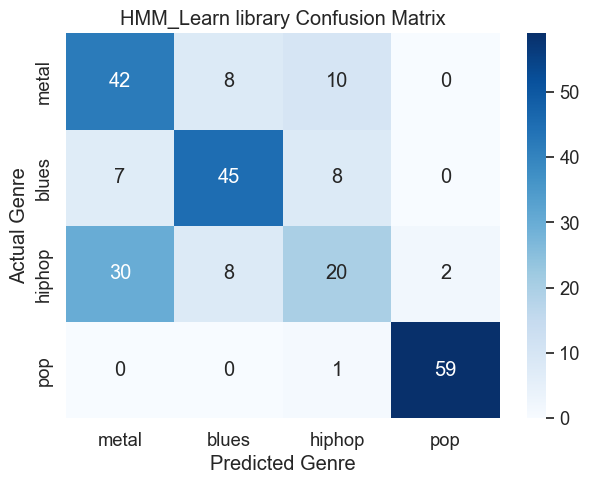

In [34]:
learn_predicts={}
accuracy, precision, recall, f1_scores_,learn_predicts = classification_models(hmm_models_learn, test_data,genres,"hmm_learn")
for genre in genres:
    print(f"For songs in genre {genre}:")
    print(f"     Accuracy: {accuracy[genre]*100:.1f}")
    print(f"    Precision: {precision[genre]*100:.1f}")
    print(f"       Recall: {recall[genre]*100:.1f}")
    print(f"     F1 Score: {f1_scores_[genre]*100:.1f}\n")
print(f"Average accuracy is {calculateAverageAccuracy(learn_predicts):.2f}\n")
for method in ["macro","micro","weighted"]:
    average_precision, average_recall, average_f1 = calculateAverageMetrics(learn_predicts,method)
    print(f"Method {method}:")
    print(f"     Average precision: {average_precision:.2f}")
    print(f"     Average recall: {average_recall:.2f}")
    print(f"     Average f1_score: {average_f1:.2f}\n")
plotConfusionMatrix(learn_predicts, genres, 'HMM_Learn library Confusion Matrix')

### scratch Model :

For songs in genre metal:
     Accuracy: 65.0
    Precision: 68.4
       Recall: 65.0
     F1 Score: 66.7

For songs in genre blues:
     Accuracy: 0.0
    Precision: 0.0
       Recall: 0.0
     F1 Score: 0.0

For songs in genre hiphop:
     Accuracy: 90.0
    Precision: 45.4
       Recall: 90.0
     F1 Score: 60.3

For songs in genre pop:
     Accuracy: 100.0
    Precision: 93.8
       Recall: 100.0
     F1 Score: 96.8

Average accuracy is 0.64

Method macro:
     Average precision: 0.52
     Average recall: 0.64
     Average f1_score: 0.56

Method micro:
     Average precision: 0.64
     Average recall: 0.64
     Average f1_score: 0.64

Method weighted:
     Average precision: 0.52
     Average recall: 0.64
     Average f1_score: 0.56



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


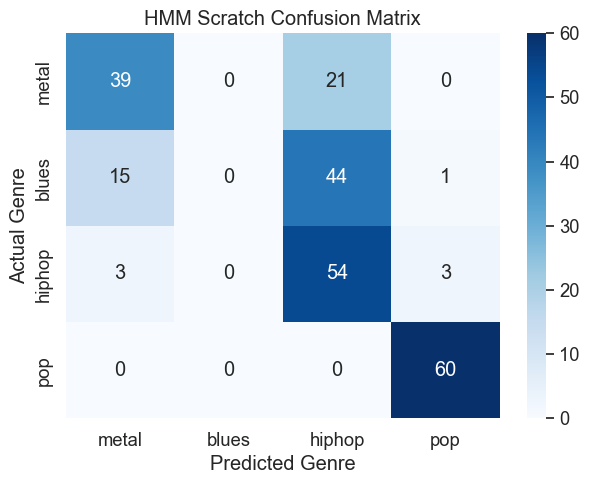

In [35]:
scratch_predicts={}    
accuracy, precision, recall, f1_scores_,scratch_predicts = classification_models(hmm_models, test_data,genres,"hmm_class")
for genre in genres:
    print(f"For songs in genre {genre}:")
    print(f"     Accuracy: {accuracy[genre]*100:.1f}")
    print(f"    Precision: {precision[genre]*100:.1f}")
    print(f"       Recall: {recall[genre]*100:.1f}")
    print(f"     F1 Score: {f1_scores_[genre]*100:.1f}\n")
print(f"Average accuracy is {calculateAverageAccuracy(scratch_predicts):.2f}\n")
for method in ["macro","micro","weighted"]:
    average_precision, average_recall, average_f1 = calculateAverageMetrics(scratch_predicts,method)
    print(f"Method {method}:")
    print(f"     Average precision: {average_precision:.2f}")
    print(f"     Average recall: {average_recall:.2f}")
    print(f"     Average f1_score: {average_f1:.2f}\n")
plotConfusionMatrix(scratch_predicts, genres, 'HMM Scratch Confusion Matrix')

## Question 1 :
### Decribe each of these metrics how analisys the model.(Accuracy/Precision/Recall/F1 Score)
    
   The output of the machine learning algorithm can be mapped to one of the following categories.   
   `TP`:True positive   
   `TN`:True negative   
   `FP`:False positive   
   `FN`:False negative
   - **Accuracy**:
       $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$  
       Accuracy represents the number of correctly classified data instances over the total number of data instances.    
   - **Precision**   
       `positive predictive value` in classifying the data instances. Precision is defined as follows:
       $$Precision = \frac{TP}{TP + FP}$$     
       Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases (which we don’t want).    
   - **Recall**   
        Recall is also known as sensitivity or true positive rate and is defined as follows:    
              $$Recall = \frac{TP}{TP + FN}$$
        Recall should ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP +FN, this also means FN is zero. As FN increases the value of denominator becomes greater than the numerator and recall value decreases (which we don’t want).     
        
        

   - **F1 Score**
       So ideally in a good classifier, we want both precision and recall to be one which also means FP and FN are zero. Therefore we need a metric that takes into account both precision and recall. F1-score is a metric which takes into account both precision and recall and is defined as follows:   
                     $$F1Score =2* \frac{Precision*Recall}{Precision + Recall}$$
## Question 2 :
### Decribe differenccess between Precision and Recall.
The diffrence between these two is each of them ignore a category that can lead to mislead prediction. 
   - **Example where Recall is high, but the model does not perform well**:     
        Suppose a model is designed to identify fraudulent transactions. If the model labels all transactions as fraudulent (high sensitivity to positive cases), then Recall would be 100% because it fails to miss any fraudulent transactions (FN=0). However, it would also misclassify all legitimate transactions as fraudulent, causing a huge problem for users and the company (high number of FPs).
   - **Example where Precision is high, but the model does not perform well**:    
        Again, consider the fraudulent transaction detection model. If the model is very conservative and only labels a transaction as fraudulent when it is absolutely certain, it may achieve a high Precision (nearly all transactions it identifies as fraudulent are truly fraudulent), but it may miss a significant number of fraudulent transactions (high FN), hence having a low Recall.    
            
   -  **Why looking at either Recall or Precision alone is not sufficient**:   
       - **High Precision, Low Recall**: The model is too conservative, only making a positive prediction when absolutely sure, and misses a significant number of actual positive cases.       
       - **High Recall, Low Precision**: The model is too liberal, catching as many positives as possible at the expense of also labeling many negatives incorrectly as positives.
## Question 3 :
### What kind of averaging does the 1F criterion use? What is the difference between this type of averaging and normal averaging and why is it important here?
The F1 score employs the harmonic mean, which is less sensitive to extreme values compared to the arithmetic mean, making it better suited for skewed data or when dealing with rates and ratios. This approach ensures that the F1 score accurately reflects model performance across imbalanced datasets by requiring high precision and recall simultaneously.
## Question 4 :
### What are Macro, Micro and Weighted Averaging?
- `Macro-Averaging`: In this approach, Precision and Recall are first computed separately for each class, after which the mean of these individual metrics is calculated. This ensures equitable weighting, with each class contributing equally to the final composite metric.
$$Macro\ Average\ Precision = \frac{\sum_{i=1}^{N} Precision_i}{N}$$
$$Macro\ Average\ Recall = \frac{\sum_{i=1}^{N} Recall_i}{N}$$

- `Micro-Averaging`: Here, aggregate counts of true positives, false positives, and false negatives for all the classes are considered collectively. Precision and Recall are then derived based on these collective numbers, giving equal importance to every single instance in the dataset.
$$Micro\ Average\ Precision = \frac{\sum_{i=1}^{N} TruePositives_i}{\sum_{i=1}^{N} TruePositives_i + FalsePositives_i}$$
$$Micro\ Average\ Recall = \frac{\sum_{i=1}^{N} TruePositives_i}{\sum_{i=1}^{N} TruePositives_i + FalseNegatives_i}$$

- `Weighted-Averaging`: This method is akin to Macro-Averaging but adjusts for class imbalance by weighting each class by its prevalence. Thus, classes with a larger number of instances exert more influence on the overall metric.
$$Weighted\ Average\ Precision = \frac{\sum_{i=1}^{N} (NumInstances_i \cdot Precision_i)}{\sum_{i=1}^{N} NumInstances_i}$$
$$Weighted\ Average\ Recall = \frac{\sum_{i=1}^{N} (NumInstances_i \cdot Recall_i)}{\sum_{i=1}^{N} NumInstances_i}$$
## Question 6 :
### Analyze the values obtained for the evaluation scales.
As we can see our hmmlearn model is doing almost great job if we dont consider hiphop and the overall scores for different citeria are satisfying.Our train model is also did pretty good job in all class except blues.it can't predict blues songs and i don't know why! 
## Question 7 :
The main difference between the two models is the inclusion of a convergence monitor in the hmmlearn model, which allows it to stop training at the best time, unlike our inflexible, hard-coded iteration approach. Our model’s efficiency limitations prevent the use of more extensive training iterations that could improve performance. Additionally, it’s likely that the hmmlearn model uses smarter hyperparameter optimization and more refined data preprocessing, which leads to its greater accuracy.

